In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('train_data_week_1_challenge.csv')

In [3]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [4]:
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets         312
establishment_year    312
dtype: int64

In [5]:
data['total_toilets'].fillna(data['total_toilets'].mean(), inplace=True)
data['establishment_year'].fillna(data['establishment_year'].mean(), inplace=True)

In [6]:
data.isnull().sum()

continue_drop         0
student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [7]:
data['continue_drop'][data['continue_drop'] == 'continue'] = 1
data['continue_drop'][data['continue_drop'] == 'drop'] = 0

/Volumes/Other/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Volumes/Other/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,1,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,1,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,1,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,1,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [9]:
data = pd.get_dummies(data,columns=['gender','caste','guardian','internet'])

In [10]:
data.head()

,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,1,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,1,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,1,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,1,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,1,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering

adding a new feature called average_marks = (mathematics_marks + science_marks + english_marks)/3

In [13]:
data['average_marks'] = (data['mathematics_marks'] + data['english_marks'] + data['science_marks'])/3

In [14]:
X1 = data.iloc[:,2:].values
y1 = data.iloc[:,0].values
y1 = np.asarray(y,dtype=np.float64)

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=.25,random_state=1)

train_accuracy1 = []
test_accuracy1 = []
n_neighbors1 = range(1,11)
for neighbors in n_neighbors1:
    knn5 = KNeighborsClassifier(n_neighbors=neighbors)
    knn5.fit(X1_train,y1_train)
    train_accuracy1.append(knn5.score(X1_train,y1_train))
    test_accuracy1.append(knn5.score(X1_test,y1_test))

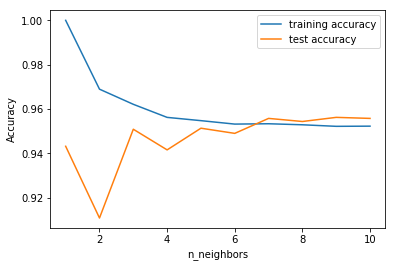

In [17]:
plt.plot(n_neighbors1, train_accuracy1, label="training accuracy")
plt.plot(n_neighbors1, test_accuracy1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
sc_X1  = StandardScaler() #feature scaling
x1_new_train = sc_X1.fit_transform(X1_train)
X1_new_test = sc_X1.transform(X1_test)

knn6 = KNeighborsClassifier(n_neighbors=7)
knn6.fit(x1_new_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [21]:
pred = knn6.predict(X1_new_test)

In [22]:
print("Training score after scaling features: {:.2f}".format(knn6.score(x1_new_train,y1_train)))
print("Test score after scaling {:.2f}".format(knn6.score(X1_new_test,y1_test)))

Training score after scaling features: 0.99
Test score after scaling 0.99


In [23]:
#evaluting using confusion matrix
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y1_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 158   29]
 [   4 4107]]


In [24]:
#loading the test_data_week_1_challenge.csv
test = pd.read_csv('test_data_week_1_challenge.csv')

In [25]:
#checking for null entries
test.isnull().sum()

student_id             0
gender                 0
caste                  0
mathematics_marks      0
english_marks          0
science_marks          0
science_teacher        0
languages_teacher      0
guardian               0
internet               0
school_id              0
total_students         0
total_toilets         26
establishment_year    26
dtype: int64

In [26]:
#fitting the null entries in the test_data_week_1_challenge.csv with mean of the data points in the columns of 
#total_toilets and establishment_year.
test['total_toilets'].fillna(test['total_toilets'].mean(), inplace=True)
test['establishment_year'].fillna(test['establishment_year'].mean(), inplace=True)

In [27]:
test.isnull().sum()

student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [28]:
#handling the categorical features
test = pd.get_dummies(test,columns=['gender','caste','guardian','internet'])

In [29]:
#adding a column which is the 'average marks' of the mathematics_marks,english_marks and science_marks
test['average_marks'] = (test['mathematics_marks'] + test['english_marks'] + test['science_marks'])/3

In [30]:
#extracting the features columns
Xtest = test.iloc[:,1:].values

In [31]:
#scaling the test set features using StandardScaler imported earlier
sc  = StandardScaler()
xtest = sc.fit_transform(Xtest)

In [32]:
#predicting the target features from the xtest features
predicted = knn6.predict(xtest)

In [33]:
#saving the predicted array npy format
np.save('predictions_2.npy',predicted)